In [1]:
from math import *
import matplotlib.pyplot as plt

g_0 = {
    (0, 1) : [((1, 0), sqrt(2))],
    (1, 0) : [((0, 1), sqrt(2)), ((2, 1), sqrt(2))],
    (2, 1) : [((1, 0), sqrt(2))],
    (0, 0) : [((1, 0), sqrt(2))],
    (2, 0) : [((1, 0), sqrt(2))]
}

g_1 = {
    (1, 1): [((2, -1), sqrt(5)), ((-1, 0), sqrt(5))],
    (-1, 0): [((2, -1), sqrt(10)), ((1, 1), sqrt(5))],
    (2, -1): [((-1, 0), sqrt(10)), ((1, 1), sqrt(5))]
}


# Generation d'un réseau
## Reseau basique

In [2]:
def reseau(n):

    out = {}

    out[(n, n)] = [(n - 1, n), (n, n - 1), (n - 1, n - 1)]
    out[(-n, -n)] = [(- n + 1, -n), (-n, -n + 1), (- n + 1, -n + 1)]
    out[(-n, n)] = [(- n + 1, n), (-n, n - 1), (-n + 1, n - 1)]
    out[(n, -n)] = [(n-1, -n), (n, -n + 1), (n - 1, -n + 1)]

    for j in range(-n+1, n):
        out[(j, n)] = [(j, n-1), (j-1, n), (j+1, n), (j+1, n-1), (j-1, n-1)]
        out[(j, -n)] = [(j, -n+1), (j-1, -n), (j+1, -n), (j+1, -n+1), (j-1, -n+1)]
    for i in range(-n+1, n):
        out[(-n, i)] = [(-n, i+1), (-n+1, i), (-n, i-1), (-n+1, i-1), (-n+1, i+1)]
        out[(n, i)] = [(n, i+1), (n-1, i), (n, i-1), (n-1, i-1), (n-1, i+1)]

    for i in range(-n+1, n):
        for j in range(-n+1, n):
            out[(i, j)] = [(i-1,j), (i+1, j), (i, j+1), (i, j-1), (i-1,j+1), (i+1, j+1), (i-1, j-1), (i+1, j-1)]

    return out


def affiche_graphe(g):
    s = list(g.keys())

    couleur_base = 'cyan'

    for i in s:
        for arrete in g[i]:
            plt.plot([i[0], arrete[0]], [i[1], arrete[1]], color = couleur_base)
        plt.plot(i[0], i[1], marker = 'o', color = couleur_base)



## Conversion graphes valués

In [3]:
def convertir_val(g):
    new = {}
    for (i, j) in g.items():
        liste_voisins = []
        for voisin in j:
            liste_voisins.append((voisin, sqrt( (voisin[0] - i[0])**2 + (voisin[1] - i[1])**2 ) ) )
        new[i] = liste_voisins
    return new

## Reseau obstacles

In [4]:
def reseau_obstacles(n, murs):
    """
    Renvoie le graphe correspondant au réseau des points à coordonnées
    entières du carré [-n, n] x [-n, n] privé des sommets apparaissant
    dans la liste murs (et par conséquent des arêtes dont ces sommets
    sont une extrémité.
    Entrée : n : int, taille du réseau de départ,
             murs : list[(x, y)], liste de sommets à retirer.
    Sortie : dict, graphe correspondant au réseau privés des sommets
             de la liste murs.
    """
    g = reseau(n)
    # Retirer les sommets de la liste murs
    for s in murs:
        if s in g.keys(): # test pour le cas où un même sommet apparaît
            del g[s]      # plusieurs fois dans murs
            
            
    # Retirer les arêtes reliant un sommet retiré à un sommet conservé
    for s in g:
        elts_communs = []
        #print(gr[s])
        for vois in g[s]:
            if vois in murs:
                elts_communs.append(vois)
        #print(elts_communs)       
        for v in elts_communs:               
            g[s].remove(v)
        
    return g


# Algorithme de Dijkstra
## Boilerplate
On doit définir quelques fonctions

In [5]:

def test(d, v):
    for (i, j) in d.items():
        if j == v: return True
    return False

def cle_de_valeur_mini(etat, dist, e):
    """
    Prend en arguments deux dictionnaires etat et dist ayant les memes cles, e une valeur du dictionnaire etat, et qui renvoie (parmi les clés de etat de valeur e) une clé dont la valeur dans le dictionnaire dist est minimale.
    """
    # Extrayons toutes les cles de `etat` de valeur e
    liste_cles = []
    mini = float('inf')

    cle = None
    for (i, j) in etat.items():
        if j == e and dist[i] < mini:
            cle = i
            mini = dist[i]
    return cle


## Implémentation algo

In [6]:

def Dijkstra_pcc(g, s, a):
    etat = {k: 'blanc' for k in g.keys()}
    etat[s] = 'gris'
    dist = {k: float('inf') for k in g.keys()}
    dist[s] = 0

    pcc = {}

    while test(etat, 'gris'):
        s_proche = cle_de_valeur_mini(etat, dist, 'gris')
        for v,w in g[s_proche]:
            if etat[v] == 'blanc':
                etat[v] = 'gris'
                dist[v] = dist[s_proche] + w
                pcc[v] = s_proche
            elif etat[v] == 'gris':
                if dist[s_proche] + w < dist[v]:
                    dist[v] = dist[s_proche] + w
                    pcc[v] = s_proche
        etat[s_proche] = 'noir'
        if s_proche == a:
            # Lorsque le sommet `a` a été traité entièrement, on sort
            break
    
    # Reconstruire le pcc
    
    chemin = [a]
    choisi = a
    while choisi != s:
        choisi = pcc[choisi]
        chemin.append(choisi)

    chemin[::-1]

    liste_noirs = []
    liste_gris = []

    for sommet,etat in etat.items():
        if etat == "gris":
            liste_gris.append(sommet)
        elif etat == "noir":
            liste_noirs.append(sommet)

    return (chemin, liste_noirs, liste_gris, dist[a])


## Visualisation

In [7]:
def visualisation_Dij(g, s, a):
    a_ponderer = convertir_val(g)

    calculer_pcc = Dijkstra_pcc(a_ponderer, s, a)
    affiche_graphe(g)

    for s in calculer_pcc[2]:
        plt.plot(s[0], s[1], marker = 'o', color = 'grey')
    for s in calculer_pcc[1]:
        plt.plot(s[0], s[1], marker = 'o', color = 'black')
    for s in calculer_pcc[0]:
        plt.plot(s[0], s[1], marker = 'o', color = 'blue')

    for i in range( len(calculer_pcc[0]) - 1 ) :
        plt.plot([calculer_pcc[0][i][0], calculer_pcc[0][i+1][0]], [calculer_pcc[0][i][1], calculer_pcc[0][i+1][1]], color = 'blue')

    plt.title("Parcours Dijkstra Classique")
    plt.show()


# La new meta: $A^*$
## Définition des heuristiques ainsi que de la façon dont on choisit les clés



In [8]:
def h(x, y):
    return sqrt((y[0] - x[0])**2 + (y[1] - x[1])**2)

def cle_de_valeur_mini_Astar(etat, dist, e, h, a):
    """
    Prend en arguments deux dictionnaires etat et dist ayant les memes cles, e une valeur du dictionnaire etat, et qui renvoie (parmi les clés de etat de valeur e) une clé dont la valeur dans le dictionnaire dist est minimale.
    """
    # Extrayons toutes les cles de `etat` de valeur e
    liste_cles = []
    mini = float('inf')

    cle = None
    for (cl, et) in etat.items():
        if et == e:
            new_d = dist[cl] + h(a, cl)
            if new_d < mini:
                cle = cl
                mini = new_d
        
    return cle


## Implémentation

In [9]:
def algoAstar_pcc(g, h, s, a):
    etat = {k: 'blanc' for k in g.keys()}
    etat[s] = 'gris'
    dist = {k: float('inf') for k in g.keys()}
    dist[s] = 0

    pcc = {}

    while test(etat, 'gris'):
        s_proche = cle_de_valeur_mini_Astar(etat, dist, 'gris', h, a)
        for v,w in g[s_proche]:
            if etat[v] == 'blanc':
                etat[v] = 'gris'
                dist[v] = dist[s_proche] + w
                pcc[v] = s_proche
            elif etat[v] == 'gris':
                if dist[s_proche] + w < dist[v]:
                    dist[v] = dist[s_proche] + w
                    pcc[v] = s_proche
        etat[s_proche] = 'noir'
        if s_proche == a:
            # Lorsque le sommet `a` a été traité entièrement, on sort
            break
    
    # Reconstruire le pcc
    
    chemin = [a]
    choisi = a
    while choisi != s:
        choisi = pcc[choisi]
        chemin.append(choisi)

    chemin[::-1]

    liste_noirs = []
    liste_gris = []

    for sommet,etat in etat.items():
        if etat == "gris":
            liste_gris.append(sommet)
        elif etat == "noir":
            liste_noirs.append(sommet)

    return (chemin, liste_noirs, liste_gris, dist[a])


## Visualisation

In [10]:

def visualisation_astar(g, h, s, a):
    a_ponderer = convertir_val(g)

    calculer_pcc = algoAstar_pcc(a_ponderer, h, s, a)
    affiche_graphe(g)

    for s in calculer_pcc[2]:
        plt.plot(s[0], s[1], marker = 'o', color = 'grey')
    for s in calculer_pcc[1]:
        plt.plot(s[0], s[1], marker = 'o', color = 'black')
    for s in calculer_pcc[0]:
        plt.plot(s[0], s[1], marker = 'o', color = 'blue')

    for i in range( len(calculer_pcc[0]) - 1 ) :
        plt.plot([calculer_pcc[0][i][0], calculer_pcc[0][i+1][0]], [calculer_pcc[0][i][1], calculer_pcc[0][i+1][1]], color = 'blue')

    plt.title("Parcours $A^*$")
    plt.show()



## Exemples explicites

Observations :
- On note qu'il y a très peu de sommets noirs (sommets traités et « inutiles » dans la mesure où seuls les sommets noirs du chemin optimal sont des sommets noirs « utiles »
- Il est immédiat graphiquement que les sommets traités obéissent à une « contrainte directionnelle » qui privilégie ceux qui orientent le chemin dans la « bonne direction » (c'est la conséquence graphique du nouveau critère de sélection de `s_proche`).

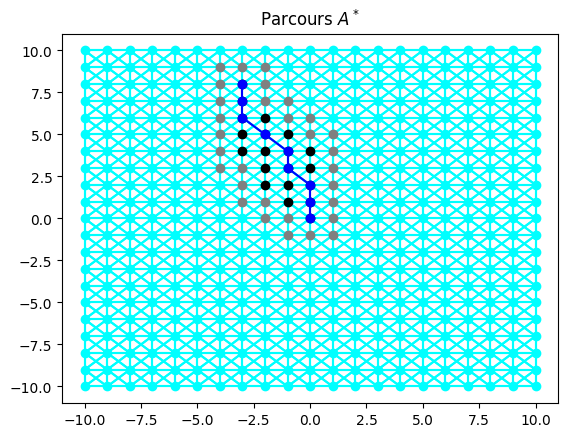

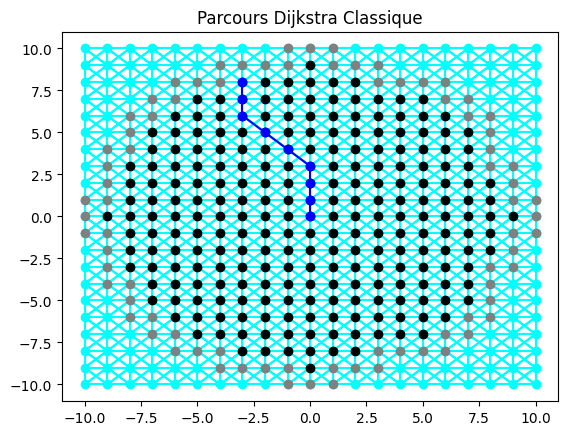

In [11]:
visualisation_astar(reseau(10), h, (0, 0), (-3, 8))
visualisation_Dij(reseau(10), (0, 0), (-3, 8))

## Changement de l'Heuristique

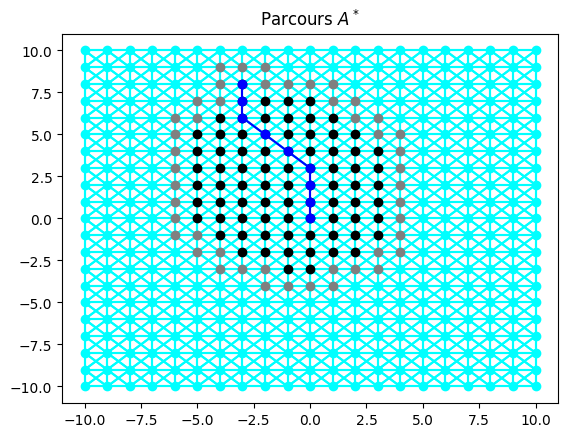

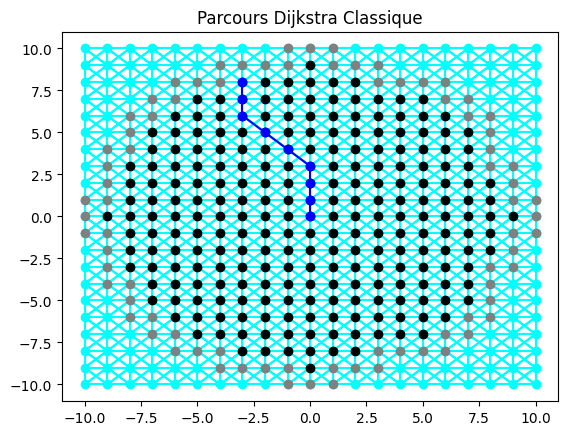

In [12]:
def h_2(x, y):
    return h(x, y) / 2

visualisation_astar(reseau(10), h_2, (0, 0), (-3, 8))
visualisation_Dij(reseau(10), (0, 0), (-3, 8))

Clairement, le parcours $A^*$ est moins précis maintenant avec cette nouvelle heuristique qui est moins précise.

$$
h_2 ((x_0, x_1), (y_0, y_1)) = \frac 1 2 h((x_0, x_1), (y_0, y_1)) = \frac 1 2 \sqrt{(x_0 - y_0)^2 + (x_1 - y_1)^2}
$$

D'une manière générale, si on réalise plusieurs simulations pour une heuristique qui se dégrade progressive- ment pour passer de `h` (distance euclidienne) à la fonction nulle (cas où l'algorithme $A^*$ redonne Dijkstra) (prendre par exemple `h`, `3*h/4`, `h/2`, `h/4` puis `0`, l'ensemble de sommets traités passe d'une forme longiligne (épaississement du segment reliant les deux sommets) à un disque de centre s et de rayon la distance de `s` à `a`.

## Obstacles
Essayons aussi avec des obstacles en faisant l'usage de la fonction `reseau_obstacles()`

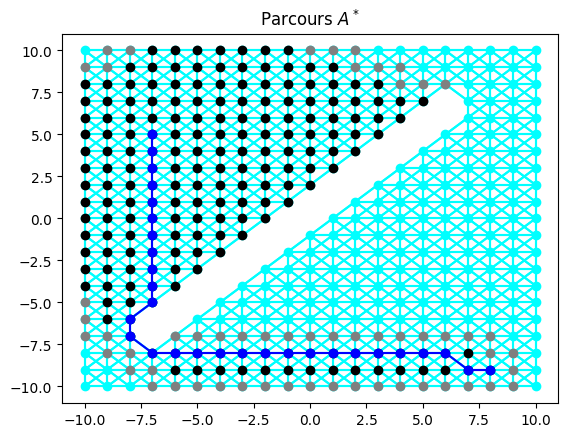

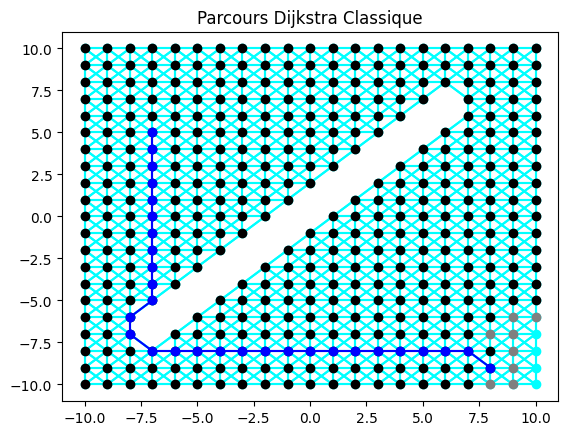

In [13]:
masque = [(a, a) for a in range(-7, 7)] + [(k, k + 1) for k in range(-7, 7)]
arbre = reseau_obstacles(10, masque)
visualisation_astar(arbre, h, (-7, 5), (8, -9))
visualisation_Dij(arbre, (-7, 5), (8, -9))

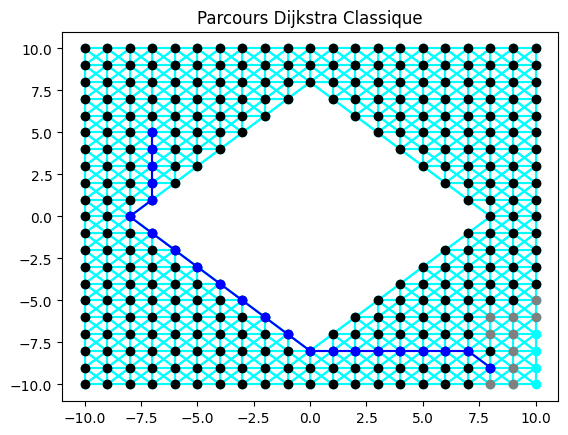

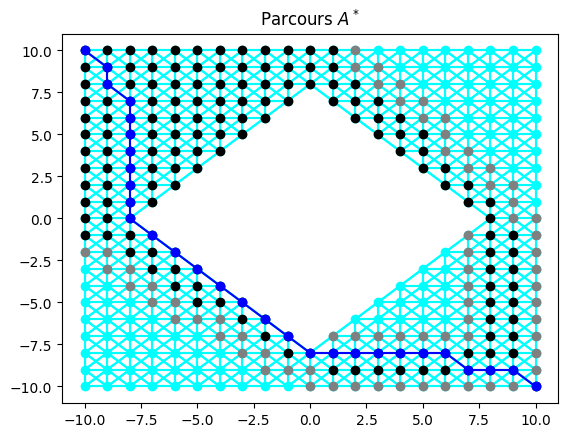

In [14]:
muraille = []
for a in range(-10, 10):
    for b in range(-10, 10):
        if abs(a) + abs(b) <= 7:
            muraille.append((a, b))
arbre = reseau_obstacles(10, muraille)
visualisation_Dij(arbre, (-7, 5), (8, -9))
visualisation_astar(reseau_obstacles(10, muraille), h, (-10, 10), (10, -10))

Note: on remarque dans ce graphe une certaine ligne noire que je ne saurais identifier.